# Install and Import Libraries

In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import string
from nltk.tokenize import word_tokenize
from textblob import TextBlob
sleep_on_rate_limit=False
import os
import nltk

import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

# MongoDB connection with Twitter API

In [ ]:
class MyStream1(tweepy.Stream):

    def __init__(self,consumer_key, consumer_secret, access_token, access_token_secret):
        super().__init__(consumer_key, consumer_secret, access_token, access_token_secret)
        #self.output_file = output_file
        
    
    def on_status(self, status):
        print(status)
        
    def on_error(self, status1):
        print(status1)    
    
    
    def on_data(self, data):
        try:
            mongo_instance = MongoClient(port=27017)
            db = mongo_instance.tweets
            js_data = json.loads(data)               
            db.twitter_search.insert(js_data)
                
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

# Extracting tweets with #40kiShakti

In [ ]:
myStream1 = MyStream1(api_key, api_key_secret, access_token, access_token_secret)
res = myStream1.filter(track='#40kiShakti')

# Reading Tweets from csv 

In [4]:
tweet_list = pd.read_csv("TWEET_DATA.csv")

C:\Users\abc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
tweet_list.head()

,Unnamed: 0,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,filter_level,lang,timestamp_ms,display_text_range,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,withheld_in_countries
0,0,616ec24416ee38f4dd277389,Tue Oct 19 13:03:59 +0000 2021,1450447637665169408,1450447637665169408,RT @str4wbrygrl: never forget what they took f...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,low,en,1634648639490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,616ec24416ee38f4dd27738c,Tue Oct 19 13:03:59 +0000 2021,1450447637182763014,1450447637182763014,@crypto_bearr @CakeRunnerme Done https://t.co/...,"<a href=""http://twitter.com/download/android"" ...",False,1.450446e+18,1.450446e+18,...,low,en,1634648639375,"[28, 32]",NaN,NaN,NaN,NaN,NaN,NaN
2,2,616ec24416ee38f4dd277390,Tue Oct 19 13:03:59 +0000 2021,1450447637635796993,1450447637635796993,RT @wapi_pay: Statement on circulation of vide...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,...,low,en,1634648639483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,616ec24416ee38f4dd277393,Tue Oct 19 13:03:59 +0000 2021,1450447637560258566,1450447637560258566,RT @oreoryeo: DON'T WANNA LET YOU GO SHSNSUSJS...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,low,en,1634648639465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,616ec24416ee38f4dd277395,Tue Oct 19 13:03:59 +0000 2021,1450447637493305347,1450447637493305347,Hey Guys! I'm now LIVE on @Stripchat. Come pla...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,...,low,en,1634648639449,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tweet_list.drop(['Unnamed: 0', '_id','id_str','source','in_reply_to_status_id','in_reply_to_status_id_str'], axis = 1,inplace=True)

In [7]:
tweet_list.drop(tweet_list.columns[3:], axis = 1,inplace=True)

In [8]:
tweet_list.drop(tweet_list.columns[0:1], axis = 1,inplace=True)

In [9]:
tweet_list.drop(tweet_list.columns[0:1], axis = 1,inplace=True)

In [10]:
tweet_list

,text
0,RT @str4wbrygrl: never forget what they took f...
1,@crypto_bearr @CakeRunnerme Done https://t.co/...
2,RT @wapi_pay: Statement on circulation of vide...
3,RT @oreoryeo: DON'T WANNA LET YOU GO SHSNSUSJS...
4,Hey Guys! I'm now LIVE on @Stripchat. Come pla...
...,...
21224,RT @spideypencil: @gabyfane @SenSanders I’m no...
21225,RT @weversetrsr: 20211019\n🐯post 🌟🌏\n\n🐯: a ph...
21226,Ooh I am liking HaHong arguing.. the acting 👏🏻...
21227,And we will still subscribe 🤭😂🤭😂🤭😂🤪


# Cleaning Tweets to Analyse Sentiment

remove duplicated tweets

In [11]:
tweet_list.drop_duplicates(inplace = True)

In [12]:
tweet_list

,text
0,RT @str4wbrygrl: never forget what they took f...
1,@crypto_bearr @CakeRunnerme Done https://t.co/...
2,RT @wapi_pay: Statement on circulation of vide...
3,RT @oreoryeo: DON'T WANNA LET YOU GO SHSNSUSJS...
4,Hey Guys! I'm now LIVE on @Stripchat. Come pla...
...,...
21223,RT @indi_hartwell: I wanna spin the bottle 🤪🤪🤪...
21224,RT @spideypencil: @gabyfane @SenSanders I’m no...
21226,Ooh I am liking HaHong arguing.. the acting 👏🏻...
21227,And we will still subscribe 🤭😂🤭😂🤭😂🤪


In [13]:
import re

cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())

def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())
custom_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
                    "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 
                    'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
                    'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
                    'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 
                    'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 
                    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 
                    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
                    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
                    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 
                    'then', 'once', 'here', 'there','fuck', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 
                    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 
                    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 
                    "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 
                    'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
                    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 
                    'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
                    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 
                    'wouldn', "wouldn't",'rt']
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
emoticons = emoticons_happy.union(emoticons_sad)
def Clean_Tweets(text):
    clean_text = text.lower()
    clean_text = remove_whitespace(clean_text)
    clean_text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', clean_text)
    clean_text = re.sub('@[^\s]+', '', clean_text)
    clean_text = emoji_pattern.sub(r'', clean_text)
    clean_text = expandContractions(clean_text, c_re=c_re)
    clean_text = re.sub(r':', '', clean_text)
    clean_text = re.sub(r'‚Ä¶', '', clean_text)
    clean_text = re.sub(r'[^\x00-\x7F]+',' ', clean_text)
    clean_text = [char for char in clean_text if char not in string.punctuation]
    clean_text = ''.join(clean_text)
    tokens = word_tokenize(clean_text)
    result = [i for i in tokens if not i in custom_stopwords]
    return ' '.join(result)

In [14]:
tweet_list['cleaned'] = tweet_list['text'].map(lambda x: Clean_Tweets(x))

In [15]:
tweet_list

,text,cleaned
0,RT @str4wbrygrl: never forget what they took f...,never forget took
1,@crypto_bearr @CakeRunnerme Done https://t.co/...,done
2,RT @wapi_pay: Statement on circulation of vide...,statement circulation video allegations social...
3,RT @oreoryeo: DON'T WANNA LET YOU GO SHSNSUSJS...,not wan na let go shsnsusjs im screaming eunhy...
4,Hey Guys! I'm now LIVE on @Stripchat. Come pla...,hey guys im live come play stripmenow stripcha...
...,...,...
21223,RT @indi_hartwell: I wanna spin the bottle 🤪🤪🤪...,wan na spin bottle
21224,RT @spideypencil: @gabyfane @SenSanders I’m no...,not sure academic paper written 1972 seems ser...
21226,Ooh I am liking HaHong arguing.. the acting 👏🏻...,ooh liking hahong arguing acting kimyoujung ki...
21227,And we will still subscribe 🤭😂🤭😂🤭😂🤪,still subscribe


# Clustering

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [17]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = tweet_list['cleaned'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [18]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[1:5000])

28554
['000', '0000', '000035', '00005usdt', '0001', '0005', '00055', '00080035', '000in', '001', '0025', '003', '0030108', '004', '005', '0055', '005eth', '006', '0066', '007', '008eth', '00mih', '00mph', '01', '010', '0100kph', '0104', '0105', '0108', '0111', '0115', '0117', '0119', '012', '013', '015', '017', '019020', '01h26mn', '02', '0200', '0234268434', '025eth', '028', '02807', '02eth', '03', '0330', '04', '0400', '043', '05', '051', '0569d195', '0590181085', '06', '06m42s', '07', '070', '0700', '0703', '0725293591', '0730740492', '079', '08', '0800', '0807', '081293980278', '081943', '0822', '0833661047', '083843804438', '08btc', '09', '0900', '0902pm0904pm', '0907pm', '0915', '0931', '0955', '0day', '0mm', '0x', '0x1lovesong', '0x4bf49497f2f106ad5e57980f1f4c26a2f514fc87', '0x4d30b192528d3edd182bae5507112de3b6a796b6l', '0xa01408b1a7d43e164517', '0xba79', '0xe3802b75cb78df1d980d5cb78', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '10000mark', '1000am', '1000s'

In [19]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [20]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\Users\abc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


21059
['aa', 'aaa', 'aaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaargghhhhhhhhhhhh', 'aaaaaahhh', 'aaaaaahhhhhhhh', 'aaaaaand', 'aaahhhhh', 'aaavotingsproof', 'aabaluuuu', 'aada', 'aag', 'aahhhh', 'aaj', 'aala', 'aalexsaab', 'aam', 'aamp', 'aap', 'aapka', 'aapki', 'aar', 'aaron', 'aarsgsgah', 'aaryan', 'aaryn', 'aat', 'aav', 'aay', 'ab', 'abad', 'abada', 'abaikan', 'abandon', 'abb', 'abbi', 'abbott', 'abbyschoic', 'abccg', 'abdelhak', 'abdomen', 'abduct', 'abdul', 'abduljabb', 'abeg']


In [21]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

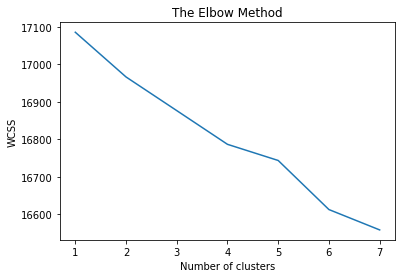

In [22]:
#K-means
from sklearn.cluster import KMeans
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=7,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [23]:
print(words[1:3000])

['absolut', 'accept', 'accord', 'account', 'achiev', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'address', 'age', 'ago', 'agre', 'ahead', 'air', 'airdrop', 'al', 'album', 'allow', 'alon', 'alreadi', 'alway', 'amaz', 'america', 'american', 'amp', 'anim', 'anniversari', 'announc', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'app', 'appear', 'appl', 'appli', 'appreci', 'area', 'armi', 'arrest', 'arriv', 'art', 'articl', 'artist', 'ask', 'ass', 'assist', 'attack', 'attent', 'author', 'automat', 'avail', 'awar', 'award', 'away', 'awesom', 'b', 'babe', 'babi', 'bad', 'bag', 'ball', 'bank', 'base', 'basic', 'battl', 'bc', 'beat', 'beauti', 'becom', 'bed', 'begin', 'believ', 'benefit', 'best', 'bet', 'better', 'biden', 'big', 'biggest', 'billboard', 'birthday', 'bit', 'bitch', 'bitcoin', 'black', 'blackpink', 'bless', 'block', 'blockchain', 'blood', 'blue', 'bodi', 'book', 'box', 'boy', 'brand', 'break', 'bright', 'bring', 'bro', 'brother', 'bts', 'build', 'busi', 'buy', 'c', 'ca', 'c

In [24]:
#5 clusters
kmeans = KMeans(n_clusters = 5, n_init = 20)# n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-100:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : love, new, im, time, need, today, know, peopl, amp, look, make, think, let, say, year, thank, come, right, got, best, happi, live, alway, video, work, thing, watch, feel, use, way, u, pleas, help, wait, th, miss, start, realli, game, week, na, someon, tri, cute, play, vote, guy, man, tell, friend, join, world, post, life, talk, ask, fan, check, hope, great, win, stop, god, x, pm, mean, k, end, mani, babi, said, beauti, read, real, everyon, support, octob, song, person, season, care, hit, open, home, girl, readi, updat, photo, project, pretti, free, everi, big, lot, chang, final, believ, w, someth
1 : day, good, morn, today, happi, look, night, love, time, great, project, come, start, hope, feel, habit, know, everi, thank, peopl, amp, make, think, friend, got, nice, week, octob, guy, realli, year, let, need, say, bad, th, im, way, use, luck, work, job, help, song, play, best, alway, gon, na, man, forget, beauti, tuesday, set, thing, better, everyon, u, idea, life, new, watch, tri, p

# Sentiment Analyse

In [25]:
tw_list = tweet_list

In [26]:
tw_list[['polarity', 'subjectivity']]=tw_list['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @str4wbrygrl: never forget what they took f...,never forget took,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
1,@crypto_bearr @CakeRunnerme Done https://t.co/...,done,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
2,RT @wapi_pay: Statement on circulation of vide...,statement circulation video allegations social...,0.033333,0.066667,negative,NaN,NaN,NaN,NaN
3,RT @oreoryeo: DON'T WANNA LET YOU GO SHSNSUSJS...,not wan na let go shsnsusjs im screaming eunhy...,0.100000,0.150000,negative,NaN,NaN,NaN,NaN
4,Hey Guys! I'm now LIVE on @Stripchat. Come pla...,hey guys im live come play stripmenow stripcha...,0.136364,0.500000,positive,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21223,RT @indi_hartwell: I wanna spin the bottle 🤪🤪🤪...,wan na spin bottle,-0.200000,0.150000,neutral,0.0,1.0,0.0,0.0
21224,RT @spideypencil: @gabyfane @SenSanders I’m no...,not sure academic paper written 1972 seems ser...,-0.194444,0.518519,negative,NaN,NaN,NaN,NaN
21226,Ooh I am liking HaHong arguing.. the acting 👏🏻...,ooh liking hahong arguing acting kimyoujung ki...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
21227,And we will still subscribe 🤭😂🤭😂🤭😂🤪,still subscribe,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0


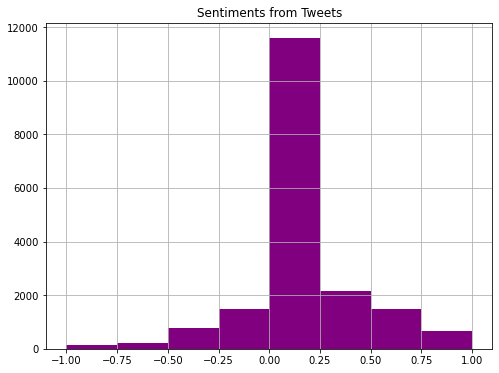

In [27]:

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tw_list['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets")
plt.show()

In [28]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [29]:
tweet_list = tweet_list
neutral_list = tw_list_neutral
negative_list = tw_list_negative
positive_list = tw_list_positive
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  18485
positive number:  7893
negative number:  3590
neutral number:  7002


In [30]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,7893,42.70
neutral,7002,37.88
negative,3590,19.42


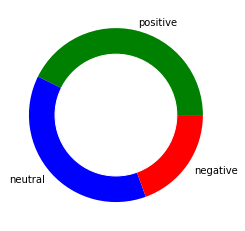

In [31]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,"sentiment")
names= piechart.index
size=piechart["Percentage"]

 # Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# wordcloud for all tweets

In [32]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("twitter_logo.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


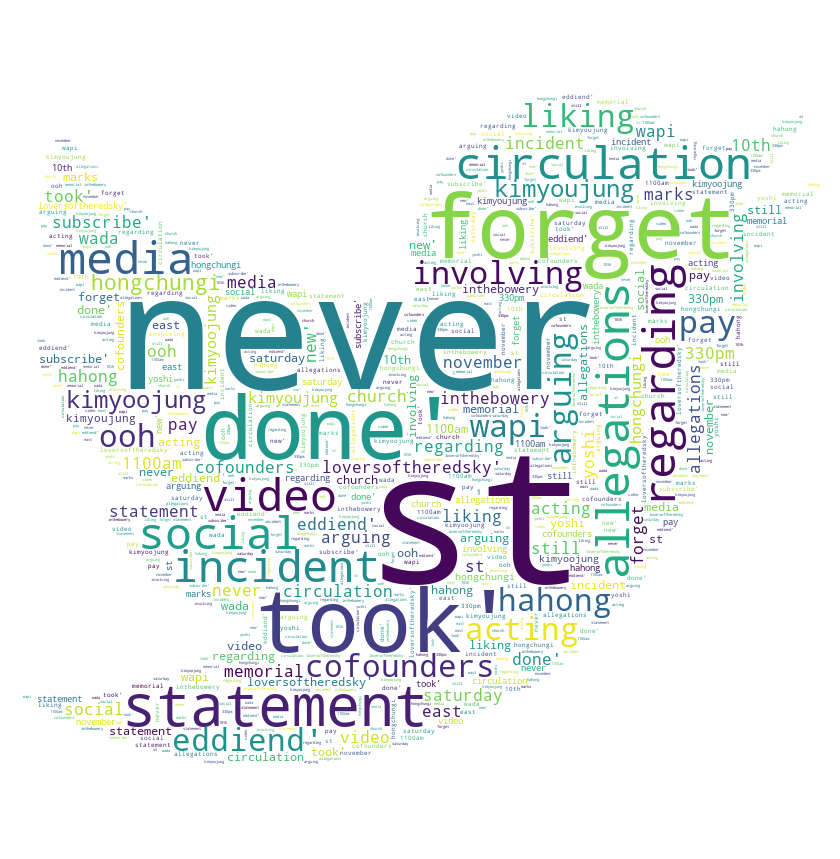

In [33]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["cleaned"].values)

# Word Cloud for tweets that have positive sentiments

Word Cloud Saved Successfully


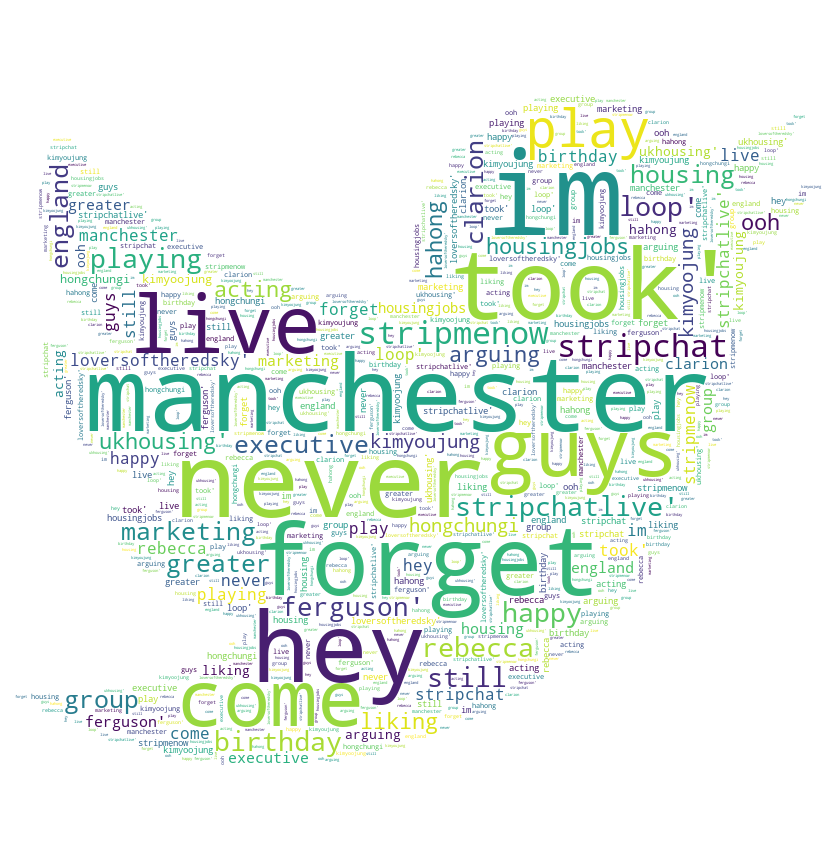

In [34]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["cleaned"].values)

# Word Cloud for tweets that have negative sentiments

Word Cloud Saved Successfully


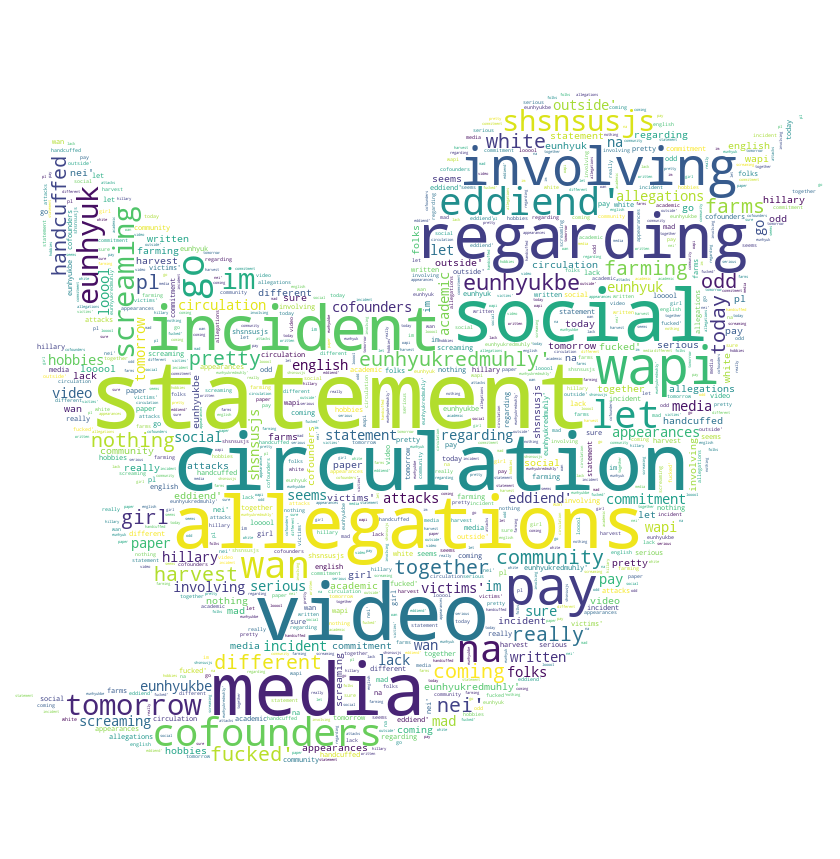

In [35]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["cleaned"].values)

# tweet length and word count

we can see the density of words and characters used in tweets based on different sentiment.

In [36]:

tw_list['text_len'] = tw_list["cleaned"].astype(str).apply(len)
tw_list['text_word_count'] = tw_list["cleaned"].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,55.91
neutral,41.08
positive,55.37


In [37]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,8.72
neutral,6.27
positive,8.67


In [38]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))


#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @str4wbrygrl: never forget what they took f...,never forget took,0.000000,0.000000,positive,NaN,NaN,NaN,NaN,17,3,RT str4wbrygrl never forget what they took fro...,"[rt, str4wbrygrl, never, forget, what, they, t...","[rt, str4wbrygrl, never, forget, took, httpstc...","[rt, str4wbrygrl, never, forget, took, httpstc..."
1,@crypto_bearr @CakeRunnerme Done https://t.co/...,done,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0,4,1,cryptobearr CakeRunnerme Done httpstco8KmVlfJ5sF,"[cryptobearr, cakerunnerme, done, httpstco8kmv...","[cryptobearr, cakerunnerme, done, httpstco8kmv...","[cryptobearr, cakerunnerm, done, httpstco8kmvl..."
2,RT @wapi_pay: Statement on circulation of vide...,statement circulation video allegations social...,0.033333,0.066667,negative,NaN,NaN,NaN,NaN,109,13,RT wapipay Statement on circulation of video a...,"[rt, wapipay, statement, on, circulation, of, ...","[rt, wapipay, statement, circulation, video, a...","[rt, wapipay, statement, circul, video, alleg,..."
3,RT @oreoryeo: DON'T WANNA LET YOU GO SHSNSUSJS...,not wan na let go shsnsusjs im screaming eunhy...,0.100000,0.150000,negative,NaN,NaN,NaN,NaN,83,12,RT oreoryeo DONT WANNA LET YOU GO SHSNSUSJS IM...,"[rt, oreoryeo, dont, wanna, let, you, go, shsn...","[rt, oreoryeo, dont, wanna, let, go, shsnsusjs...","[rt, oreoryeo, dont, wanna, let, go, shsnsusj,..."
4,Hey Guys! I'm now LIVE on @Stripchat. Come pla...,hey guys im live come play stripmenow stripcha...,0.136364,0.500000,positive,NaN,NaN,NaN,NaN,61,9,Hey Guys Im now LIVE on Stripchat Come play wi...,"[hey, guys, im, now, live, on, stripchat, come...","[hey, guys, im, live, stripchat, come, play, s...","[hey, guy, im, live, stripchat, come, play, st..."


In [39]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['cleaned'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

18485 Number of reviews has 21242 words


,,aa,aaa,aaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaaaaa,aaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaargghhhhhhhhhhhh,...,zoo,zoom,zori,zozan,zrfe,ztao,zue,zulu,zwe,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
like,1043
get,762
one,737
amp,726
love,663
peopl,616
follow,592
day,588
go,582
new,535


# building n2_bigram, n3_trigram

In [41]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['cleaned'],(2,2),20)
n2_bigrams

[('automatically checked', 108),
 ('good morning', 98),
 ('wan na', 92),
 ('gon na', 92),
 ('unfollowed automatically', 84),
 ('people followed', 75),
 ('amp follow', 56),
 ('follow amp', 52),
 ('people unfollowed', 45),
 ('got ta', 41),
 ('feel like', 39),
 ('person unfollowed', 39),
 ('fans club', 36),
 ('24 hours', 35),
 ('followed people', 35),
 ('club year', 35),
 ('happy birthday', 34),
 ('amp like', 33),
 ('year rawrawards2021', 33),
 ('authority figure', 32)]

In [42]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['cleaned'],(3,3),20)
n3_trigrams

[('unfollowed automatically checked', 84),
 ('people unfollowed automatically', 45),
 ('person unfollowed automatically', 39),
 ('followed people unfollowed', 35),
 ('people followed people', 34),
 ('fans club year', 33),
 ('donbelle fans club', 32),
 ('club year rawrawards2021', 32),
 ('like pouting throwing', 27),
 ('pouting throwing fit', 27),
 ('throwing fit pre', 27),
 ('fit pre virgo', 27),
 ('followed person unfollowed', 27),
 ('followed automatically checked', 24),
 ('year rawrawards2021 rawrdonbelle', 24),
 ('rest best answer', 23),
 ('best answer worries', 23),
 ('answer worries including', 23),
 ('worries including ones', 23),
 ('including ones ca', 23)]

# Topic Modelling

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(tw_list['cleaned']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [45]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [46]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [47]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,good,398.8,video,174.6,not,1123.6,want,336.8,amp,528.6,no,450.5,us,468.2,happy,169.5,like,540.8,make,274.9
1,like,209.1,week,151.3,love,509.2,today,291.6,follow,373.1,im,450.3,let,322.9,hope,152.8,one,331.4,u,235.1
2,look,205.1,new,127.7,know,390.6,go,235.6,2,338.0,see,380.1,na,229.1,need,151.5,would,326.2,really,218.5
3,morning,191.1,take,120.0,people,211.2,day,231.9,1,327.9,not,307.0,get,153.2,well,150.8,year,198.1,never,215.1
4,right,184.3,part,115.8,new,206.6,first,186.7,3,296.4,got,272.1,always,143.9,everyone,149.1,years,147.0,man,168.1
5,someone,181.8,start,107.2,think,201.8,watch,154.7,giveaway,232.1,back,251.9,guys,115.0,could,136.6,time,132.0,not,137.8
6,2021,159.1,two,104.1,much,160.4,game,137.4,join,215.4,best,238.2,vote,99.7,project,125.1,fans,127.1,cute,125.1
7,may,132.5,next,102.3,thank,153.9,time,125.2,people,200.1,done,147.8,pretty,99.1,keep,121.1,get,125.5,use,122.9
8,tell,130.4,school,85.1,also,122.5,win,124.6,person,180.1,check,139.1,gon,98.1,life,116.2,say,116.7,sure,109.4
9,feel,130.4,wait,85.0,even,122.4,live,110.7,retweet,176.5,real,124.0,wan,92.1,via,115.9,another,111.1,ive,104.9


In [48]:
# joining with space content of text
text = ' '.join([i for i in tweet_list['cleaned']])  
  
# replacing ',' by space
text = text.replace(",", ".")  
  
#displaying result
print(text)
file1 = open("MyFile.txt","a")
file1.write(text)

never forget took done statement circulation video allegations social media regarding incident involving wapi pay cofounders eddiend not wan na let go shsnsusjs im screaming eunhyuk tomorrow eunhyukbe eunhyukredmuhly hey guys im live come play stripmenow stripchat stripchatlive really nothing like farming community today 8 different farms coming together harvest nei blindsided crushed not expect buoyed rescued rene im still playing loop lol heard kbs hangeul day special documentary btsamparmy lti learned korean thanks btsgt aired oct24 1410kst kbs beautifully written sociomathematical take capitalist society squidgame must read wa gm friends republican bill cassidy says not vote trump 2024 trump might lose gop nomination runs no genre enhypen photos top 10 weeks artist 100 1 36th week 1 2 3 4 5 6 rest may best answer worries including ones ca scorpio events never liked ending either love streaming wrong way want kind says wron sure not prophet muhammadpbuh follower inconsistency import

943874

# Summerisation of Tweets

In [49]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
 
def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix


def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
       

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

In [53]:
generate_summary("MyFile.txt", top_n=5)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IndexError: list index out of range